In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


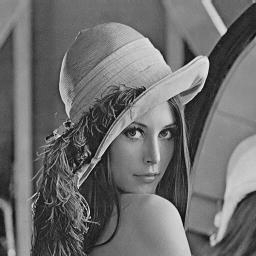

In [3]:
img1 = cv2.imread('/content/gdrive/My Drive/colab/images/lena256.jpg')
RGB_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gimg1.shape)
# plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

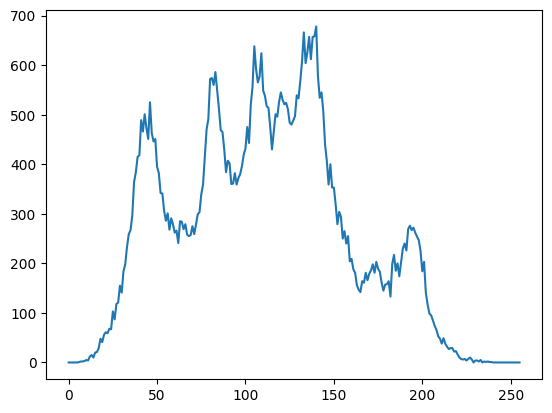

In [4]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0, 255])
plt.plot(hist)

(256, 256)


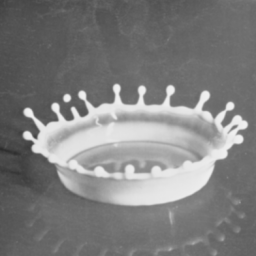

In [7]:
# img1 = cv2.imread('/content/gdrive/My Drive/colab/images/rice.bmp')
# img1 = cv2.imread('/content/gdrive/My Drive/colab/images/cell.bmp')
# img1 = cv2.imread('/content/gdrive/My Drive/colab/images/cell-bright.bmp')
img1 = cv2.imread('/content/gdrive/My Drive/colab/images/milkdrop.bmp')
RGB_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gimg1.shape)
# plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

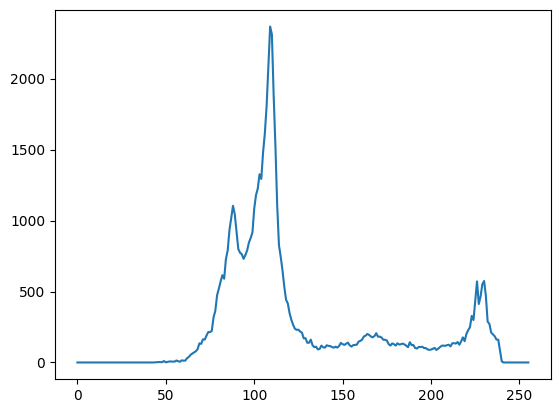

In [8]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0, 255])
plt.plot(hist)

In [11]:
gBin = np.zeros((gimg1.shape[0], gimg1.shape[1]))

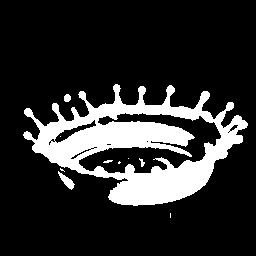

In [12]:
T = 175

for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if gimg1[h, w] > T:
      gBin[h, w] = 255
    else:
      gBin[h, w] = 0
# plt.imshow(gBin, cmap='gray')
cv2_imshow(gBin)

In [13]:
T1 = 50
T2 = 0
T0 = 1

outimg = np.zeros((gimg1.shape[0], gimg1.shape[1]))

In [14]:
def threshold_update(img, output, T1):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if(output[h, w] == 255):
        sum1 += img[h, w]
        count1 += 1
      else:
        sum2 += img[h, w]
        count2 += 1

  avg1 = sum1 / count1
  avg2 = sum2 / count2

  T2 = np.int32(avg1 + avg2)/ 2
  return T2




In [15]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if (gimg1[h, w] > T1):
      outimg[h, w] = 255
    else:
      outimg[h, w] = 0


In [16]:
while True:
  T2 = threshold_update(gimg1, outimg, T1)

  if(np.abs(T2 - T1) < T0):
    for h in range(gimg1.shape[0]):
      for w in range(gimg1.shape[1]):
        if(gimg1[h, w] > T2):
          outimg[h, w] = 255
        else:
          outimg[h, w] = 0
    break;
  else:
    T1 = T2
    for h in range(gimg1.shape[0]):
      for w in range(gimg1.shape[1]):
        if(gimg1[h, w] > T2):
          outimg[h, w] = 255
        else:
          outimg[h, w] = 0







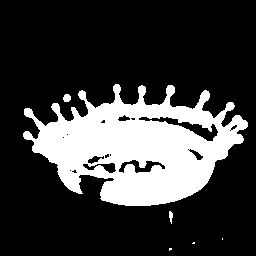

In [17]:
cv2_imshow(outimg)